<a href="https://colab.research.google.com/github/JinGunseon/APS/blob/main/%EC%8B%A4%EC%8A%B5_%EC%A3%BC%EC%8B%9D_%EC%8B%9C%EC%9E%A5_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주식시장 분석

- 2012-1-1 ~ 2021-12-31 기간의 Tesla, FORD, Apple 의 주가 등락, 변동성, 수익률 비교  


In [1]:
! pip install --upgrade yfinance

import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings("ignore")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.7/113.7 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 24.7 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.57
    Uninstalling yfinance-0.2.57:
      Successfully uninstalled yfinance-0.2.57


## yfinance 를 이용한 주가 data 가져오기

In [5]:
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2022, 7, 31)

tesla_t = yf.Ticker('TSLA')
tesla = tesla_t.history(start=start, end=end)
tesla = tesla[['Close', 'Volume']]
tesla

,Close,Volume
Date,,
2012-01-03 00:00:00-05:00,1.872000,13921500
2012-01-04 00:00:00-05:00,1.847333,9451500
2012-01-05 00:00:00-05:00,1.808000,15082500
2012-01-06 00:00:00-05:00,1.794000,14794500
2012-01-09 00:00:00-05:00,1.816667,13455000
...,...,...
2022-07-25 00:00:00-04:00,268.433319,64073400
2022-07-26 00:00:00-04:00,258.859985,66820800
2022-07-27 00:00:00-04:00,274.820007,88110000


In [6]:
apple_t = yf.Ticker('AAPL')
apple = apple_t.history(start=start, end=end)
apple = apple[['Close', 'Volume']]

In [15]:
apple

,Close,Volume,log close
Date,,,
2012-01-03 00:00:00-05:00,12.375391,302220800,2.515710
2012-01-04 00:00:00-05:00,12.441895,260022000,2.521069
2012-01-05 00:00:00-05:00,12.580025,271269600,2.532110
2012-01-06 00:00:00-05:00,12.711538,318292800,2.542510
2012-01-09 00:00:00-05:00,12.691374,394024400,2.540923
...,...,...,...
2022-07-25 00:00:00-04:00,150.732330,53623900,5.015506
2022-07-26 00:00:00-04:00,149.401917,55138700,5.006640
2022-07-27 00:00:00-04:00,154.516632,78620700,5.040302


In [7]:
ford_t = yf.Ticker("F")
ford = ford_t.history(start=start, end=end)
ford = ford[['Close', 'Volume']]

In [16]:
ford

,Close,Volume,log close
Date,,,
2012-01-03 00:00:00-05:00,5.954180,45709900,1.784093
2012-01-04 00:00:00-05:00,6.045124,79725200,1.799252
2012-01-05 00:00:00-05:00,6.200264,67877500,1.824592
2012-01-06 00:00:00-05:00,6.264460,59840700,1.834892
2012-01-09 00:00:00-05:00,6.312609,53981500,1.842549
...,...,...,...
2022-07-25 00:00:00-04:00,10.304603,36830500,2.332591
2022-07-26 00:00:00-04:00,10.063840,49272300,2.308949
2022-07-27 00:00:00-04:00,10.585489,64572300,2.359484


## 주가 추이 시각화

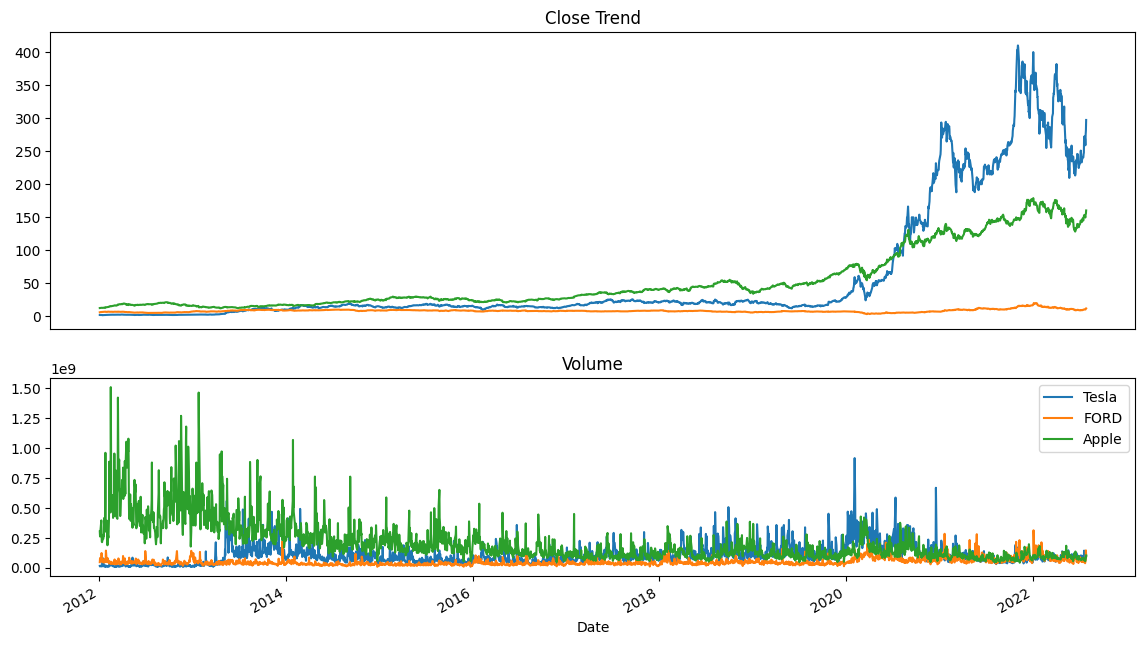

In [8]:
from matplotlib import gridspec

# Figure 크기를 10x8로 설정하고, 그리드 구조(GridSpec)를 사용하여 서브플롯을 구성
# 첫 번째 플롯은 높이 비율을 3으로, 두 번째 플롯은 높이 비율을 2로 설정하여 2개의 서브플롯을 만듭니다.
fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 2])

# 서브플롯을 리스트에 추가합니다.
axes = []
axes.append(plt.subplot(gs[0]))  # 첫 번째 서브플롯
axes.append(plt.subplot(gs[1]))  # 두 번째 서브플롯

# 첫 번째 서브플롯의 x축(날짜 레이블)을 숨깁니다.
axes[0].get_xaxis().set_visible(False)

# 첫 번째 서브플롯에 테슬라(Tesla), 포드(FORD), 애플(Apple)의 종가 데이터를 플로팅합니다.
# 각 주식의 'Close'(종가) 열을 플로팅하고, 제목을 "Close Trend"로 설정합니다.
tesla['Close'].plot(ax=axes[0], label='Tesla', figsize=(14, 8), title="Close Trend")
ford['Close'].plot(ax=axes[0], label='FORD')
apple['Close'].plot(ax=axes[0], label='Apple')

# 두 번째 서브플롯에 테슬라(Tesla), 포드(FORD), 애플(Apple)의 거래량 데이터를 플로팅합니다.
# 각 주식의 'Volume'(거래량) 열을 플로팅하고, 제목을 "Volume"으로 설정합니다.
tesla['Volume'].plot(ax=axes[1], label='Tesla', figsize=(14, 8), title="Volume")
ford['Volume'].plot(ax=axes[1], label='FORD')
apple['Volume'].plot(ax=axes[1], label='Apple')

# 범례(legend)를 추가하여 플롯에 표시된 라인들을 구분할 수 있도록 합니다.
plt.legend()
plt.show()

**최대 거래량 발생 일자**

In [10]:
tesla['Volume'].idxmax(), apple['Volume'].idxmax(), ford['Volume'].idxmax()

(Timestamp('2020-02-04 00:00:00-0500', tz='America/New_York'),
 Timestamp('2012-02-15 00:00:00-0500', tz='America/New_York'),
 Timestamp('2022-01-04 00:00:00-0500', tz='America/New_York'))

## Log Close Price
- 서로 scale 이 다른 주가에 대한 실제 변화율을 시각화 하기 위해 price 의 log 를 취함

In [11]:
# 테슬라(Tesla) 주식의 'Close' 열을 로그 값으로 변환하여 'log close' 열에 저장합니다.
tesla['log close'] = np.log(tesla['Close'])

# 포드(Ford) 주식의 'Close' 열을 로그 값으로 변환하여 'log close' 열에 저장합니다.
ford['log close'] = np.log(ford['Close'])

# 애플(Apple) 주식의 'Close' 열을 로그 값으로 변환하여 'log close' 열에 저장합니다.
apple['log close'] = np.log(apple['Close'])

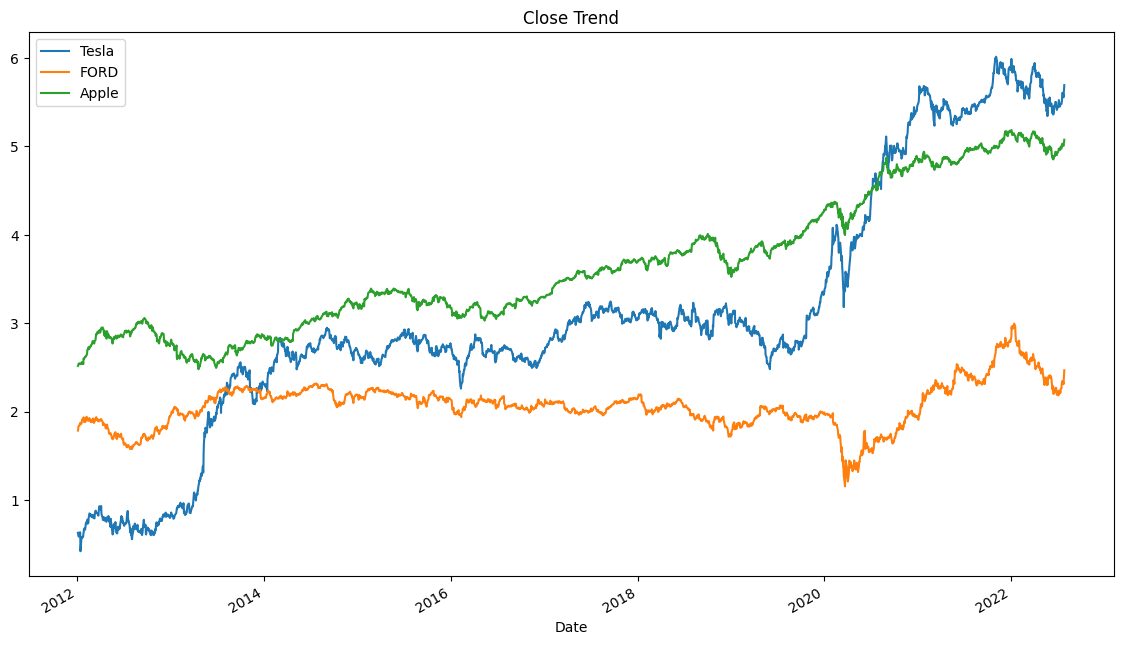

In [14]:
# 테슬라(Tesla)의 로그 변환된 종가('log close') 데이터를 플로팅합니다.
# ax1은 서브플롯을 지정하며, label은 'Tesla', 제목은 "Close Trend"로 설정합니다.
tesla['log close'].plot(label='Tesla', figsize=(14, 8), title="Close Trend")

# 포드(Ford)의 로그 변환된 종가('log close') 데이터를 플로팅합니다.
ford['log close'].plot(label='FORD')

# 애플(Apple)의 로그 변환된 종가('log close') 데이터를 플로팅합니다.
apple['log close'].plot(label='Apple')

plt.legend()

## Normalized Price

- 시초가를 1 로 맞추어 놓고 변화된 상대 가격 비교

In [17]:
tesla['norm close'] = tesla['Close'] / tesla['Close'].iloc[0]
ford['norm close'] = ford['Close'] / ford['Close'].iloc[0]
apple['norm close'] = apple['Close'] / apple['Close'].iloc[0]

In [18]:
tesla

,Close,Volume,log close,norm close
Date,,,,
2012-01-03 00:00:00-05:00,1.872000,13921500,0.627007,1.000000
2012-01-04 00:00:00-05:00,1.847333,9451500,0.613743,0.986823
2012-01-05 00:00:00-05:00,1.808000,15082500,0.592221,0.965812
2012-01-06 00:00:00-05:00,1.794000,14794500,0.584448,0.958333
2012-01-09 00:00:00-05:00,1.816667,13455000,0.597003,0.970442
...,...,...,...,...
2022-07-25 00:00:00-04:00,268.433319,64073400,5.592603,143.393869
2022-07-26 00:00:00-04:00,258.859985,66820800,5.556287,138.279908
2022-07-27 00:00:00-04:00,274.820007,88110000,5.616116,146.805561


In [19]:
apple

,Close,Volume,log close,norm close
Date,,,,
2012-01-03 00:00:00-05:00,12.375391,302220800,2.515710,1.000000
2012-01-04 00:00:00-05:00,12.441895,260022000,2.521069,1.005374
2012-01-05 00:00:00-05:00,12.580025,271269600,2.532110,1.016536
2012-01-06 00:00:00-05:00,12.711538,318292800,2.542510,1.027163
2012-01-09 00:00:00-05:00,12.691374,394024400,2.540923,1.025533
...,...,...,...,...
2022-07-25 00:00:00-04:00,150.732330,53623900,5.015506,12.180005
2022-07-26 00:00:00-04:00,149.401917,55138700,5.006640,12.072501
2022-07-27 00:00:00-04:00,154.516632,78620700,5.040302,12.485798


In [20]:
ford

,Close,Volume,log close,norm close
Date,,,,
2012-01-03 00:00:00-05:00,5.954180,45709900,1.784093,1.000000
2012-01-04 00:00:00-05:00,6.045124,79725200,1.799252,1.015274
2012-01-05 00:00:00-05:00,6.200264,67877500,1.824592,1.041330
2012-01-06 00:00:00-05:00,6.264460,59840700,1.834892,1.052111
2012-01-09 00:00:00-05:00,6.312609,53981500,1.842549,1.060198
...,...,...,...,...
2022-07-25 00:00:00-04:00,10.304603,36830500,2.332591,1.730650
2022-07-26 00:00:00-04:00,10.063840,49272300,2.308949,1.690214
2022-07-27 00:00:00-04:00,10.585489,64572300,2.359484,1.777825


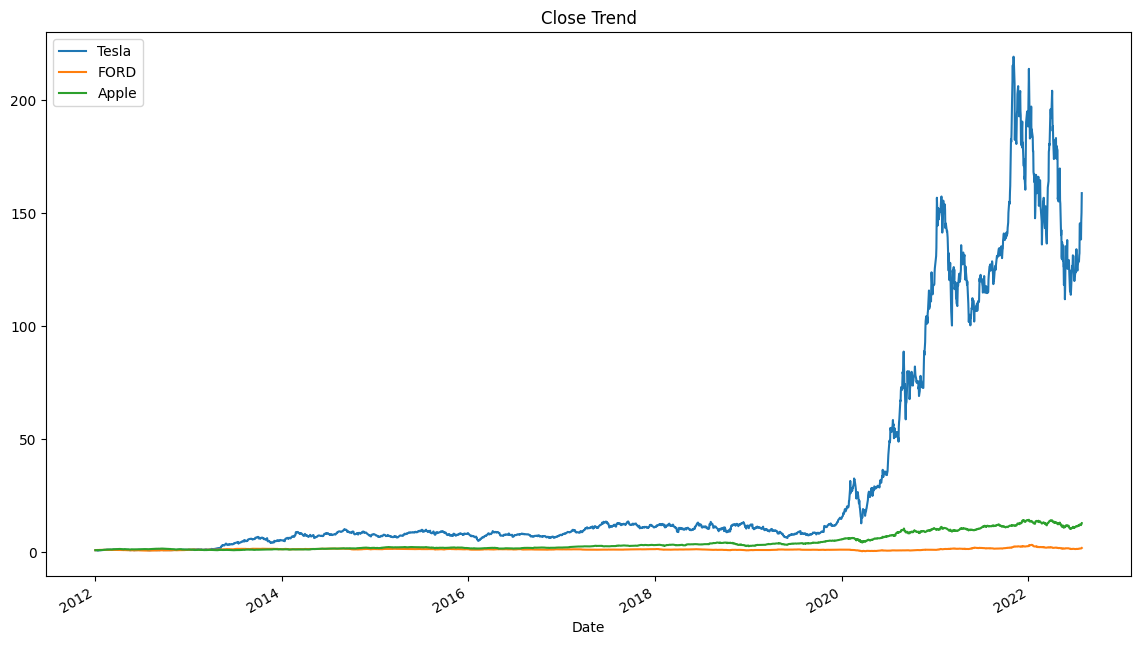

In [21]:
# 테슬라(Tesla)의 정규화된 종가('norm close') 데이터를 플로팅합니다.
# ax1은 서브플롯을 지정하며, label은 'Tesla', 제목은 "Close Trend"로 설정합니다.
tesla['norm close'].plot(label='Tesla', figsize=(14, 8), title="Close Trend")

# 포드(Ford)의 정규화된 종가('norm close') 데이터를 플로팅합니다.
ford['norm close'].plot(label='FORD')

# 애플(Apple)의 정규화된 종가('norm close') 데이터를 플로팅합니다.
apple['norm close'].plot(label='Apple')

plt.legend()

## 주식 종목간의 correlation 분석

- Tesla 주식이  Apple 과 관련 있는지, GM 과 관련 있는지 분석

In [22]:
from pandas.plotting import scatter_matrix

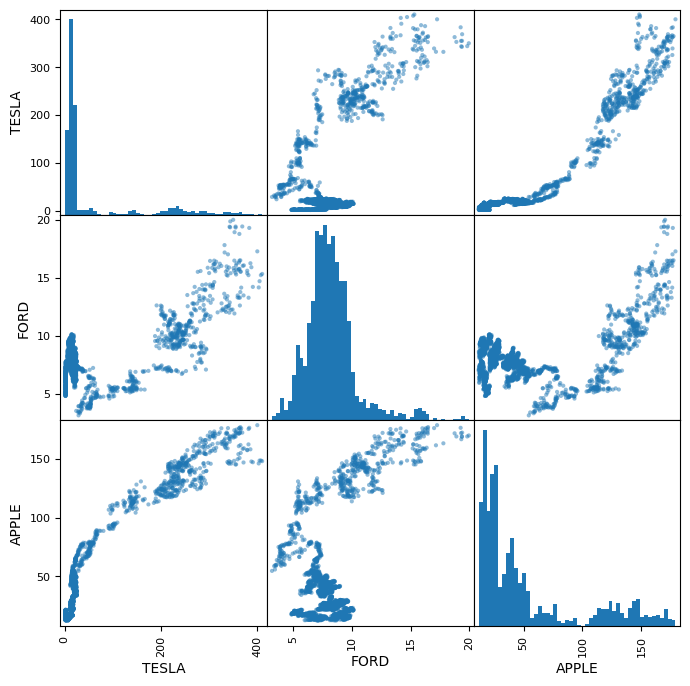

In [26]:
df = pd.concat([tesla['Close'], ford['Close'], apple['Close']], axis =1)
df.columns = ['TESLA', 'FORD', 'APPLE']
df
scatter_matrix(df, figsize=(8, 8), hist_kwds={'bins':50});

In [27]:
df.corr()

,TESLA,FORD,APPLE
TESLA,1.000000,0.645409,0.951569
FORD,0.645409,1.000000,0.495228
APPLE,0.951569,0.495228,1.000000


## 일일 수익율 (Daily Percentage Change)

- 주식을 구입하고 다음 날 팔았을 때의 이득 (손실)

- 주식의 변동성 분석에 유용

- 일일 수익율의 분포가 넓으면 변동성 큼

$r_t = \frac{P_t}{P_{t-1}} - 1$

$수익(율) = \frac{당일가격}{전일가격} - 1$

```
tesla['return'] = tesla['Close'] / tesla['Close'].shift(1) - 1
tesla['return'] = tesla['Close'].pct_change(1)  
```

- histogram 으로 얼마나 넓게 분포하는지 check

In [31]:
# Tesla, Ford, Apple의 일일 수익률을 계산합니다.

# Tesla의 수익률: 현재 종가를 이전 종가로 나누고 1을 빼서 계산합니다.
tesla['return'] = tesla['Close'] / tesla['Close'].shift(1) - 1

# Ford의 수익률: pandas의 pct_change()를 사용하여 계산합니다.
ford['return'] = ford['Close'].pct_change(1)

# Apple의 수익률: pandas의 pct_change()를 사용하여 계산합니다.
apple['return'] = apple['Close'].pct_change(1)

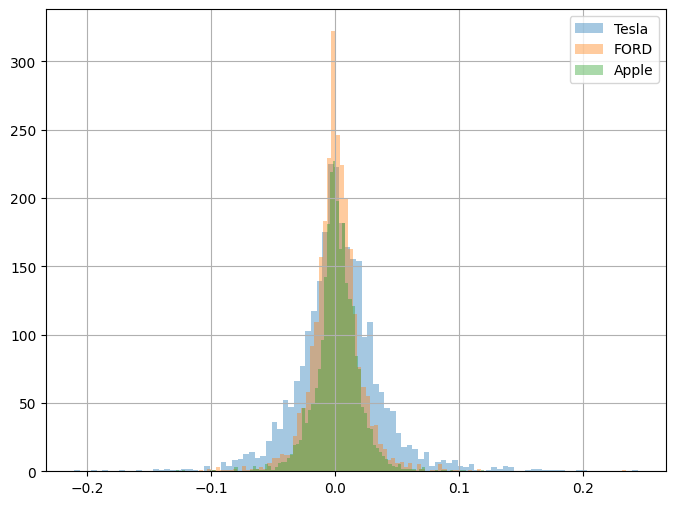

In [34]:
# Tesla, Ford, Apple의 수익률 분포를 히스토그램으로 시각화합니다.

# Tesla의 수익률 히스토그램을 생성합니다.
# 100개의 구간으로 나누고, 투명도를 설정하여 겹쳐 보이도록 합니다.
tesla['return'].hist(bins=100, label='Tesla', alpha=0.4, figsize=(8, 6));

# Ford의 수익률 히스토그램을 생성합니다.
# 100개의 구간으로 나누고, 투명도를 설정하여 겹쳐 보이도록 합니다.
ford['return'].hist(bins=100, label='FORD', alpha=0.4);

# Apple의 수익률 히스토그램을 생성합니다.
# 100개의 구간으로 나누고, 투명도를 설정하여 겹쳐 보이도록 합니다.
apple['return'].hist(bins=100, label='Apple', alpha=0.4);

plt.legend();
plt.show()

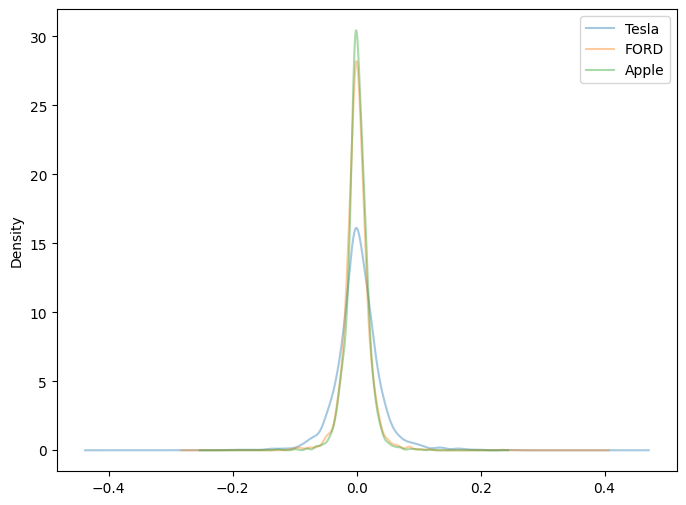

In [35]:
# Tesla, Ford, Apple의 수익률 분포를 히스토그램으로 시각화합니다.

# Tesla의 수익률 히스토그램을 생성합니다.
# 100개의 구간으로 나누고, 투명도를 설정하여 겹쳐 보이도록 합니다.
tesla['return'].plot(kind = 'kde', label='Tesla', alpha=0.4, figsize=(8, 6));

# Ford의 수익률 히스토그램을 생성합니다.
# 100개의 구간으로 나누고, 투명도를 설정하여 겹쳐 보이도록 합니다.
ford['return'].plot(kind = 'kde', label='FORD', alpha=0.4);

# Apple의 수익률 히스토그램을 생성합니다.
# 100개의 구간으로 나누고, 투명도를 설정하여 겹쳐 보이도록 합니다.
apple['return'].plot(kind = 'kde', label='Apple', alpha=0.4);

plt.legend();
plt.show()

In [36]:
import seaborn as sns

df = pd.concat([tesla['return'], apple['return'], ford['return']], axis =1)
df.columns = ['TESLA', 'APPLE', 'FORD']
df

,TESLA,APPLE,FORD
Date,,,
2012-01-03 00:00:00-05:00,NaN,NaN,NaN
2012-01-04 00:00:00-05:00,-0.013177,0.005374,0.015274
2012-01-05 00:00:00-05:00,-0.021292,0.011102,0.025664
2012-01-06 00:00:00-05:00,-0.007743,0.010454,0.010354
2012-01-09 00:00:00-05:00,0.012635,-0.001586,0.007686
...,...,...,...
2022-07-25 00:00:00-04:00,-0.013995,-0.007398,0.001560
2022-07-26 00:00:00-04:00,-0.035664,-0.008826,-0.023365
2022-07-27 00:00:00-04:00,0.061655,0.034235,0.051834


<Axes: >

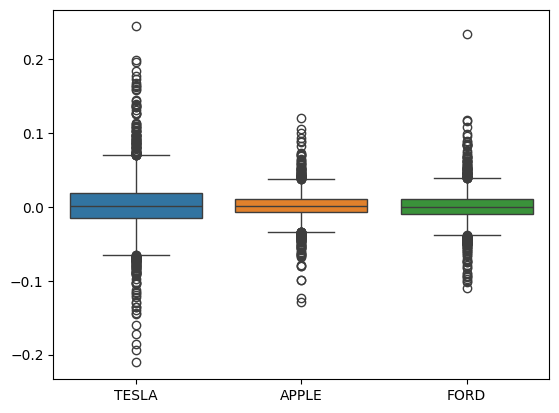

In [37]:
sns.boxplot(data = df)

## 누적일일수익률 (Cumulative Daily Returns)

- 1 불을 투자했을 때 누적적으로 가장 수익이 많이 났을 주식 파악

$i_t = (1+r_t) * i_{t-1}$  


$누적수익률 = (1 + 당일수익률) * 전일자 누적수익률$

In [38]:
tesla['cum return'] = (1+tesla['return']).cumprod()

,Close,Volume,log close,norm close,return,cum return
Date,,,,,,
2012-01-03 00:00:00-05:00,1.872000,13921500,0.627007,1.000000,NaN,NaN
2012-01-04 00:00:00-05:00,1.847333,9451500,0.613743,0.986823,-0.013177,0.986823
2012-01-05 00:00:00-05:00,1.808000,15082500,0.592221,0.965812,-0.021292,0.965812
2012-01-06 00:00:00-05:00,1.794000,14794500,0.584448,0.958333,-0.007743,0.958333
2012-01-09 00:00:00-05:00,1.816667,13455000,0.597003,0.970442,0.012635,0.970442
...,...,...,...,...,...,...
2022-07-25 00:00:00-04:00,268.433319,64073400,5.592603,143.393869,-0.013995,143.393869
2022-07-26 00:00:00-04:00,258.859985,66820800,5.556287,138.279908,-0.035664,138.279908
2022-07-27 00:00:00-04:00,274.820007,88110000,5.616116,146.805561,0.061655,146.805561


In [39]:
apple['cum return'] = (1+apple['return']).cumprod()
ford['cum return'] = (1+ford['return']).cumprod()

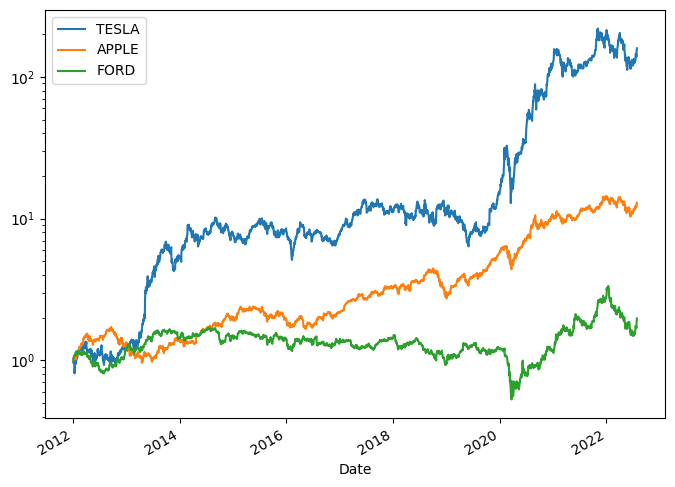

In [42]:
tesla['cum return'].plot(label = 'TESLA', figsize = (8,6))
apple['cum return'].plot(label = 'APPLE', figsize = (8,6))
ford['cum return'].plot(label = 'FORD', figsize = (8,6))
plt.legend()
plt.yscale('log')

In [43]:
tesla.iloc[[0, -1]]

,Close,Volume,log close,norm close,return,cum return
Date,,,,,,
2012-01-03 00:00:00-05:00,1.872000,13921500,0.627007,1.000000,NaN,NaN
2022-07-29 00:00:00-04:00,297.149994,95313000,5.694237,158.733973,0.05785,158.733973


In [45]:
ford.iloc[[0, -1]]

,Close,Volume,log close,norm close,return,cum return
Date,,,,,,
2012-01-03 00:00:00-05:00,5.954180,45709900,1.784093,1.000000,NaN,NaN
2022-07-29 00:00:00-04:00,11.789299,94551600,2.467192,1.980004,0.049286,1.980004


In [46]:
apple.iloc[[0, -1]]

,Close,Volume,log close,norm close,return,cum return
Date,,,,,,
2012-01-03 00:00:00-05:00,12.375391,302220800,2.515710,1.000000,NaN,NaN
2022-07-29 00:00:00-04:00,160.153717,101786900,5.076134,12.941306,0.032793,12.941306
